<a href="https://colab.research.google.com/github/Fjolnirr/FakeNewsClassifier/blob/main/FakeNewsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Classifier

Dataset: https://www.kaggle.com/c/fake-news/data#

In [ ]:
#Go to the dataset directory
cd "../content/"

/content


In [49]:
#import necessary libraries
import pandas as pd

In [52]:
url = 'https://raw.githubusercontent.com/Fjolnirr/FakeNewsClassifier/main/Resources/train.csv'
#Read csv file from github
df = pd.read_csv(url, engine='python', error_bad_lines=False)

Skipping line 13535: field larger than field limit (131072)
Skipping line 19783: field larger than field limit (131072)
Skipping line 13541: Expected 5 fields in line 13541, saw 6
Skipping line 19782: Expected 5 fields in line 19782, saw 7
Skipping line 19783: Expected 5 fields in line 19783, saw 10
Skipping line 19785: Expected 5 fields in line 19785, saw 14
Skipping line 19787: Expected 5 fields in line 19787, saw 8
Skipping line 19789: Expected 5 fields in line 19789, saw 7
Skipping line 19790: Expected 5 fields in line 19790, saw 15
Skipping line 19791: Expected 5 fields in line 19791, saw 9
Skipping line 19792: Expected 5 fields in line 19792, saw 9
Skipping line 19793: Expected 5 fields in line 19793, saw 12
Skipping line 19794: Expected 5 fields in line 19794, saw 15
Skipping line 19795: Expected 5 fields in line 19795, saw 8
Skipping line 19796: Expected 5 fields in line 19796, saw 20
Skipping line 19797: Expected 5 fields in line 19797, saw 8
Skipping line 19798: Expected 5 fi

In [51]:
# Or Read the data from file
df = pd.read_csv('../content/train.csv', engine="python",error_bad_lines=False)

Skipping line 13535: field larger than field limit (131072)
Skipping line 15854: unexpected end of data
Skipping line 13541: Expected 5 fields in line 13541, saw 6


In [53]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [54]:
#Get the independent features
X = df.drop('label', axis=1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [55]:
y = df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: object

In [56]:
df.shape

(20822, 5)

## Preprocessing

In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [58]:
#Drop the rows where at least one element is missing.
df = df.dropna() 
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [59]:
messages = df.copy()
messages.reset_index(inplace=True)
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [60]:
messages['title'][:10]

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                    Why the Truth Might Get You Fired
3    15 Civilians Killed In Single US Airstrike Hav...
4    Iranian woman jailed for fictional unpublished...
5    Jackie Mason: Hollywood Would Love Trump if He...
6    Benoît Hamon Wins French Socialist Party’s Pre...
7    A Back-Channel Plan for Ukraine and Russia, Co...
8    Obama’s Organizing for Action Partners with So...
9    BBC Comedy Sketch "Real Housewives of ISIS" Ca...
Name: title, dtype: object

In [61]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Stopwords and Stemming

In [62]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps = PorterStemmer()
corpus=[]
for i in range(0, len(messages)):
  review = re.sub('[^a-zA-Z]', " ", messages['title'][i])
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)


In [63]:
corpus[:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

### Bag of Words

In [26]:
# Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = vectorizer.fit_transform(corpus).toarray()

### TF-IDF

In [27]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=vectorizer.fit_transform(corpus).toarray()

In [67]:
X.shape

(18285, 5000)

In [68]:
y=messages['label']

### Split Data (Train and Test)

In [69]:
#Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [70]:
vectorizer.get_feature_names()[:20]

AttributeError: ignored

In [71]:
vectorizer.get_params()

{'alternate_sign': True,
 'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'n_features': 5000,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None}

In [72]:
count_df = pd.DataFrame(X_train, columns=vectorizer.get_feature_names())

AttributeError: ignored

In [73]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,abstain,absurd,abus,abus new,abus new york,academi,accept,access,access pipelin,access pipelin protest,accid,accident,accord,account,accus,accus trump,achiev,acknowledg,acknowledg emf,acknowledg emf damag,aclu,acquit,acquitt,acr,across,act,act like,act new,act new york,action,...,xi,xi jinp,yahoo,yale,ye,year,year ago,year breitbart,year eve,year later,year new,year new york,year old,year old girl,yemen,yet,yet anoth,yiannopoulo,yield,yo,york,york citi,york new,york new york,york time,yorker,young,youth,youtub,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.432575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.127817,0.0,0.0,0.0,0.128093,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
import matplotlib.pyplot as plt

In [75]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## MultinomialNB Algorithm

In [76]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [77]:
from sklearn import metrics
import numpy as np
import itertools

In [78]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy : %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

ValueError: ignored

In [40]:
y_train.shape

(12250,)

## Passive Aggressive Classifier Algorithm

In [41]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy : 0.913
Confusion matrix, without normalization


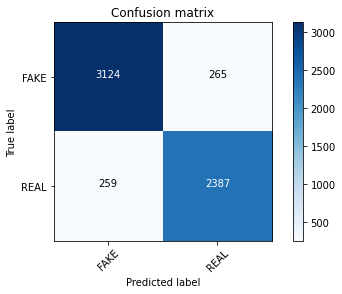

In [42]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy : %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

## Multinomial Classifier with Hyperparameter

In [43]:
classifier = MultinomialNB()

In [44]:
preScore = 0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train, y_train)
    y_pred = sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score > preScore:
      classifier = sub_classifier
    preScore = score
    print('alpha : {:.3f}, Score : {}'.format(alpha, score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


alpha : 0.000, Score : 0.8619718309859155
alpha : 0.100, Score : 0.8770505385252693
alpha : 0.200, Score : 0.8783761391880696
alpha : 0.300, Score : 0.8792046396023198
alpha : 0.400, Score : 0.8792046396023198
alpha : 0.500, Score : 0.87970173985087
alpha : 0.600, Score : 0.87970173985087
alpha : 0.700, Score : 0.8803645401822701
alpha : 0.800, Score : 0.8805302402651202
alpha : 0.900, Score : 0.8806959403479702


In [45]:
#Get Feature Names
feature_names = vectorizer.get_feature_names()

In [46]:
classifier.coef_[0]

array([-8.51719319, -8.51719319, -8.51719319, ..., -8.51719319,
       -8.51719319, -8.51719319])

In [47]:
# Most Real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[0:20]

[(-8.517193191416238, 'zuckerberg'),
 (-8.517193191416238, 'zu'),
 (-8.517193191416238, 'zoo'),
 (-8.517193191416238, 'zone new york'),
 (-8.517193191416238, 'zone new'),
 (-8.517193191416238, 'zone'),
 (-8.517193191416238, 'zionist'),
 (-8.517193191416238, 'zika viru'),
 (-8.517193191416238, 'zika'),
 (-8.517193191416238, 'zero'),
 (-8.517193191416238, 'zealand'),
 (-8.517193191416238, 'youtub'),
 (-8.517193191416238, 'youth'),
 (-8.517193191416238, 'young'),
 (-8.517193191416238, 'yorker'),
 (-8.517193191416238, 'york time'),
 (-8.517193191416238, 'york new york'),
 (-8.517193191416238, 'york new'),
 (-8.517193191416238, 'york citi'),
 (-8.517193191416238, 'york')]

In [48]:
# Most Fake
sorted(zip(classifier.coef_[0], feature_names))[0:20]

[(-8.517193191416238, 'abandon'),
 (-8.517193191416238, 'abc'),
 (-8.517193191416238, 'abc news'),
 (-8.517193191416238, 'abduct'),
 (-8.517193191416238, 'abe'),
 (-8.517193191416238, 'abedin'),
 (-8.517193191416238, 'abl'),
 (-8.517193191416238, 'abort'),
 (-8.517193191416238, 'abroad'),
 (-8.517193191416238, 'absolut'),
 (-8.517193191416238, 'abstain'),
 (-8.517193191416238, 'absurd'),
 (-8.517193191416238, 'abus'),
 (-8.517193191416238, 'abus new'),
 (-8.517193191416238, 'abus new york'),
 (-8.517193191416238, 'academi'),
 (-8.517193191416238, 'accept'),
 (-8.517193191416238, 'access'),
 (-8.517193191416238, 'access pipelin'),
 (-8.517193191416238, 'access pipelin protest')]